**Load the Data**

In [352]:
# data structures and data handling
import pandas as pd
import numpy as np

# data loading
import os
import kagglehub

# plotting libraties
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Download the dataset
path = kagglehub.dataset_download("christopheiv/winemagdata130k")
fname = 'winemag-data-130k-v2.csv'
reviews = pd.read_csv(os.path.join(path, fname), index_col=0)
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Data Cleaning**

In [353]:
reviews.drop(['price', 'taster_twitter_handle', 'designation', 'region_1', 'region_2'], axis=1, inplace=True)
reviews = reviews[reviews.country.notna()&reviews.variety.notna()]
reviews.info()
reviews

<class 'pandas.core.frame.DataFrame'>
Index: 129907 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   country      129907 non-null  object
 1   description  129907 non-null  object
 2   points       129907 non-null  int64 
 3   province     129907 non-null  object
 4   taster_name  103664 non-null  object
 5   title        129907 non-null  object
 6   variety      129907 non-null  object
 7   winery       129907 non-null  object
dtypes: int64(1), object(7)
memory usage: 8.9+ MB


,country,description,points,province,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,Mosel,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


**Data Augmentation**

In [354]:
# helper to extract year from review title
import re
title_pattern = re.compile(r'\D(19[0-9]{2}|20[0-9]{2})')

def vintage(title):
  m = title_pattern.findall(title)
  if len(m) > 0:
    m = title_pattern.findall(title)
    m.sort()
    return int(m[-1])
  return None


# extract year from title
reviews['year'] = reviews.title.apply(vintage)

# extract review length
reviews['review_len'] = reviews.description.str.len()

# add point category
# define a map from points to quality rating
rating_lookup = {i: 'acceptable' for i in range(80, 83)}
rating_lookup.update({i: 'good' for i in range(83, 87)})
rating_lookup.update({i: 'very good' for i in range(87, 90)})
rating_lookup.update({i: 'excellent' for i in range(90, 94)})
rating_lookup.update({i: 'superb' for i in range(94, 98)})
rating_lookup.update({i: 'classic' for i in range(98, 101)})
assert rating_lookup[90] == 'excellent'
reviews['rating'] = reviews.points.map(rating_lookup)

**EDA**

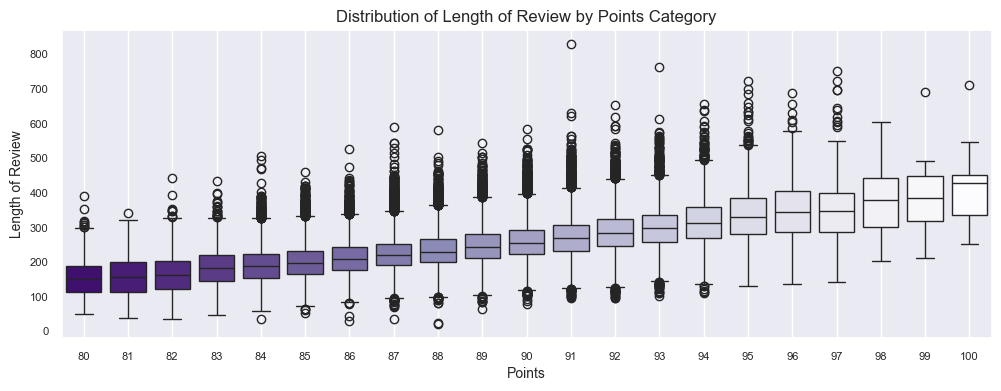

In [355]:
plt.figure(figsize=(12,4))
sns.boxplot(x = 'points', y = 'review_len', palette = 'Purples_r', hue='points', data = reviews, native_scale=False, legend=None)
plt.title("Distribution of Length of Review by Points Category", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Length of Review",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid()
plt.show()

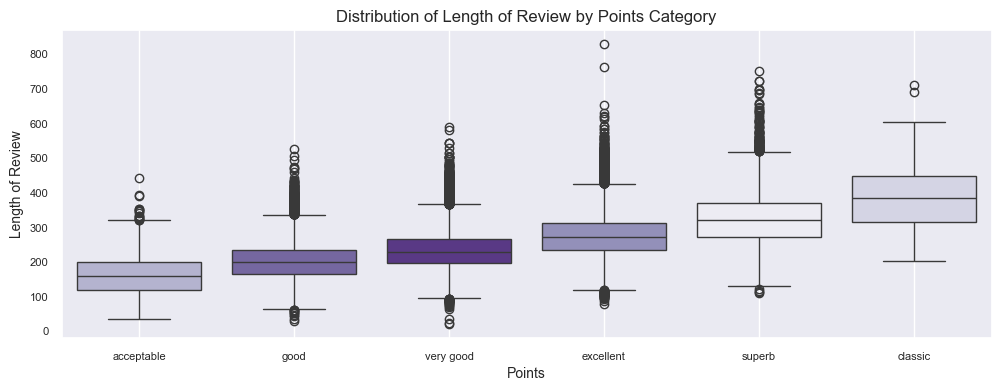

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns

ratings = ['acceptable', 'good', 'very good', 'excellent', 'superb', 'classic']

plt.figure(figsize=(12,4))
sns.boxplot(x = 'rating', y = 'review_len', palette = 'Purples_r', hue='rating', data = reviews, native_scale=False, legend=None, order=ratings)
plt.title("Distribution of Length of Review by Points Category", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Length of Review",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid()
plt.show()

In [357]:
reviews_by_year.iloc[:50]

,count
year,
2012.0,11322
2013.0,11089
2014.0,11039
2010.0,9221
2011.0,9062
2009.0,7581
2015.0,6565
2008.0,5828
2007.0,5564


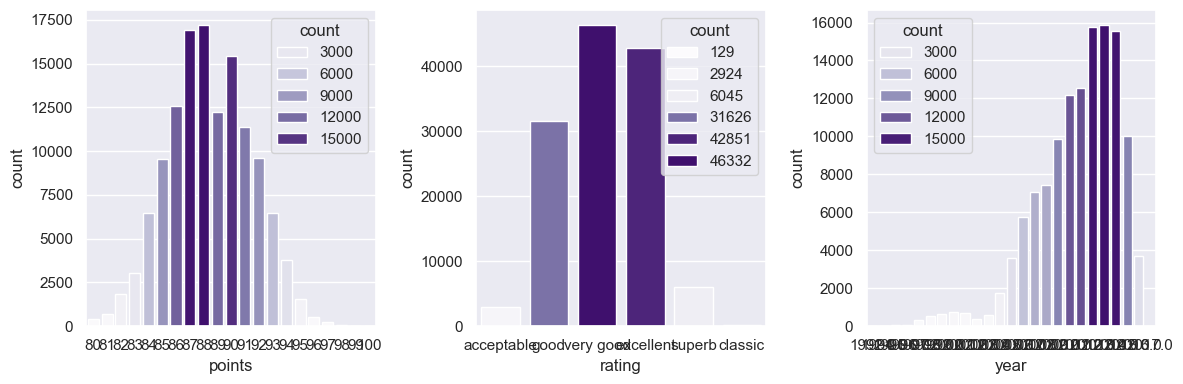

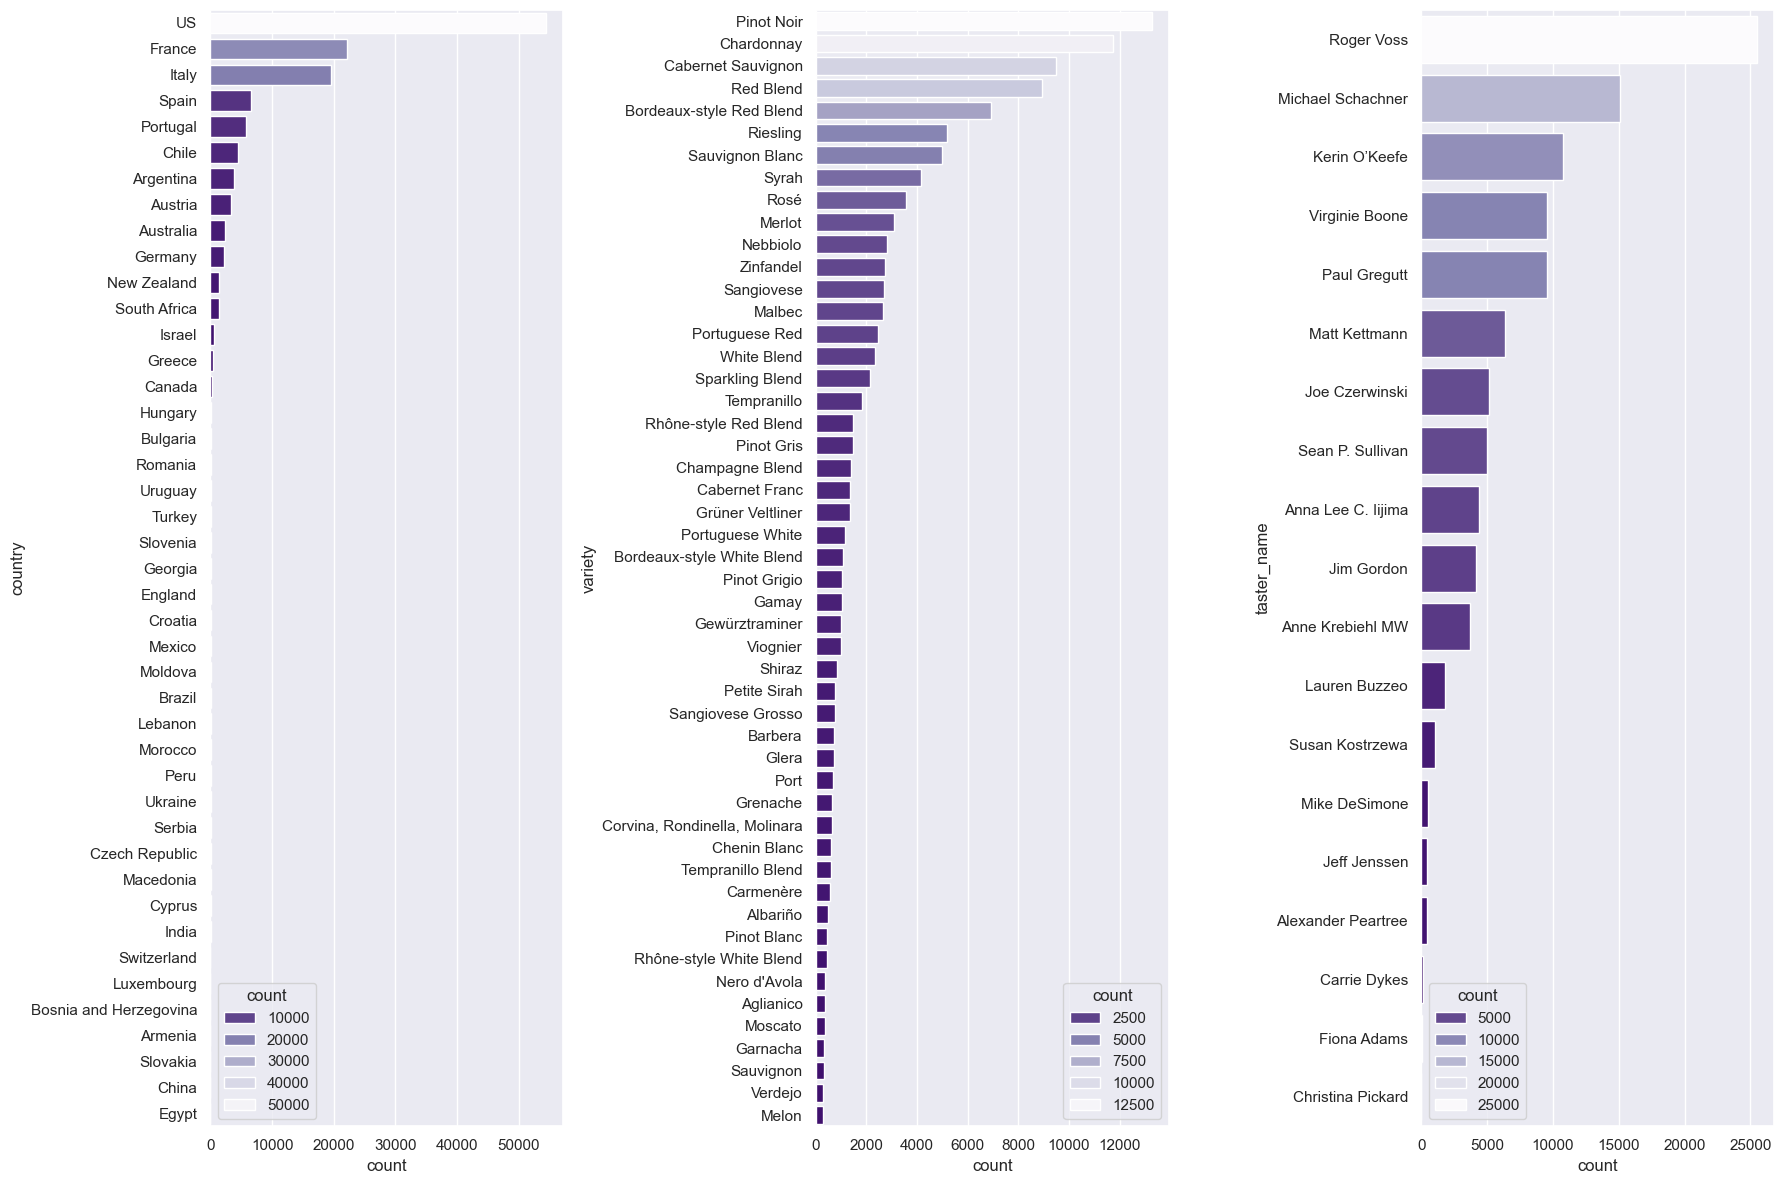

In [358]:
by_ = lambda col, df = reviews: df[col].value_counts().to_frame()

reviews_by_points = by_('points')
reviews_by_rating = by_('rating')
reviews_by_year = by_('year')

reviews_by_country = by_('country')
reviews_by_variety = by_('variety')
reviews_by_taster = by_('taster_name')

fig, ax = plt.subplots(1,3, figsize=(12,4))
sns.barplot(reviews_by_points, hue='count', x='points', y='count', palette='Purples', ax=ax[0])
sns.barplot(reviews_by_rating, hue='count', x='rating', y='count', palette='Purples', ax=ax[1], order=ratings)
sns.barplot(reviews_by_year.iloc[:25], hue='count', x='year', y='count', palette='Purples', ax=ax[2])
fig.tight_layout()
plt.show()

top_n = 50
fig, ax = plt.subplots(1,3, figsize=(18,12))
sns.barplot(reviews_by_country[:top_n], hue='count', y='country', x='count', palette='Purples_r', ax=ax[0])
sns.barplot(reviews_by_variety[:top_n], hue='count', y='variety', x='count', palette='Purples_r', ax=ax[1])
sns.barplot(reviews_by_taster[:top_n], hue='count', y='taster_name', x='count', palette='Purples_r', ax=ax[2])
fig.tight_layout()
plt.show()




In [359]:
# define cut-offs
country_threshold = 750
variety_threshold = 300
year_threshold = 1000

In [360]:
mask = reviews.country.isin(reviews_by_country.query(f'count > {country_threshold}').index)
mask &= reviews.variety.isin(reviews_by_variety.query(f'count > {variety_threshold}').index)
mask &= reviews.year.isin(reviews_by_year.query(f'count > {year_threshold}').index)

reviews = reviews[mask].copy(deep=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105517 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      105517 non-null  object 
 1   description  105517 non-null  object 
 2   points       105517 non-null  int64  
 3   province     105517 non-null  object 
 4   taster_name  84844 non-null   object 
 5   title        105517 non-null  object 
 6   variety      105517 non-null  object 
 7   winery       105517 non-null  object 
 8   year         105517 non-null  float64
 9   review_len   105517 non-null  int64  
 10  rating       105517 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 9.7+ MB


**Duplicate Reviews**

In [361]:
reviews.description.value_counts().sort_values(ascending=False).to_frame().query('count > 1')

,count
description,
"Ripe plum, game, truffle, leather and menthol are some of the aromas you'll find on this earthy wine. The tightly wound palate offers dried black cherry, chopped sage, mint and roasted coffee bean alongside raspy tannins that leave a mouth-drying finish.",3
"Seductively tart in lemon pith, cranberry and pomegranate, this refreshing, light-bodied quaff is infinitely enjoyable, both on its own or at the table. It continues to expand on the palate into an increasing array of fresh flavors, finishing in cherry and orange.",3
"Cigar box, café au lait, and dried tobacco aromas are followed by coffee and cherry flavors, with barrel spices lingering on the finish. The wood gets a bit out front but it still delivers enjoyment.",3
"Stalky aromas suggest hay and green herbs, with raspberry in the backdrop. It's hot and short in terms of mouthfeel, with herbal flavors leading the way and berry fruit running behind. Dry red fruit and herbal notes dominate the finish.",3
"This zesty red has pretty aromas that suggest small red berry, blue flower and a whiff of moist soil. The vibrant palate offers sour cherry, pomegranate and a hint of anise alongside zesty acidity and refined tannins.",3
...,...
"Another tiny cuvée from Amoureuses (80 cases produced), this one blends 40% Syrah, 35% Grenache and 25% Merlot. Toasted-coconut oak scents lead the way, followed by oodles of black plums and cherries, a splash of vanilla and a pinch of cinnamon. It's full bodied and velvety textured; rich, like dessert without sugar. Drink now–2025.",2
"Lighter in color, this blend of Conner Lee, Red Mountain Vineyard and Elephant Mountain fruit has aromas of freshly brewed coffee, dark chocolate, toasty barrel spices and red fruit, with the barrel notes taking the lead. It's silky-soft in feel, with generous raspberry flavors that show a pleasing sense of balance, all backed by a light squeeze of tannins.",2
"Underbrush, dark berry and tilled soil aromas come together along with a whiff of iris. On the brisk palate, dried sage, anise and orange peel accent the tart cherry core. Bracing acidity provides the backbone.",2


In [362]:
reviews.drop_duplicates('description', keep=False, inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88940 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      88940 non-null  object 
 1   description  88940 non-null  object 
 2   points       88940 non-null  int64  
 3   province     88940 non-null  object 
 4   taster_name  70469 non-null  object 
 5   title        88940 non-null  object 
 6   variety      88940 non-null  object 
 7   winery       88940 non-null  object 
 8   year         88940 non-null  float64
 9   review_len   88940 non-null  int64  
 10  rating       88940 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.1+ MB


**Impute Taster**

In [363]:
reviews.loc[reviews.taster_name.isna(), 'taster_name'] = 'Unknown'
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88940 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      88940 non-null  object 
 1   description  88940 non-null  object 
 2   points       88940 non-null  int64  
 3   province     88940 non-null  object 
 4   taster_name  88940 non-null  object 
 5   title        88940 non-null  object 
 6   variety      88940 non-null  object 
 7   winery       88940 non-null  object 
 8   year         88940 non-null  float64
 9   review_len   88940 non-null  int64  
 10  rating       88940 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.1+ MB


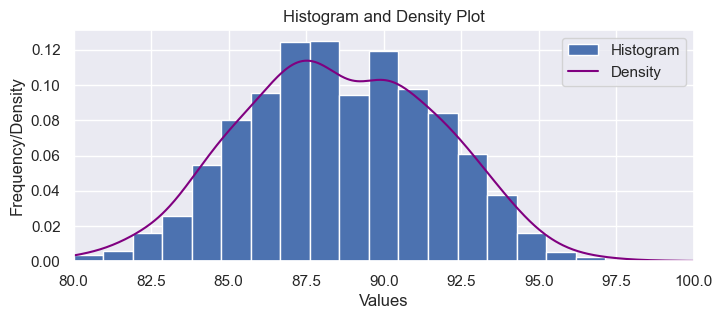

In [364]:
# Sample DataFrame
plt.figure(figsize=(8,3))

# Plot histogram and density function
reviews.points.plot.hist(density=True, bins=reviews.points.nunique(), alpha=1) # Histogram
reviews.points.plot.density(bw_method=.25, color='purple') # Density plot

plt.xlabel('Values')
plt.ylabel('Frequency/Density')
plt.title('Histogram and Density Plot')
plt.legend(['Histogram', 'Density'])
plt.grid(True)
plt.xlim((reviews.points.min(), reviews.points.max()))
plt.show()

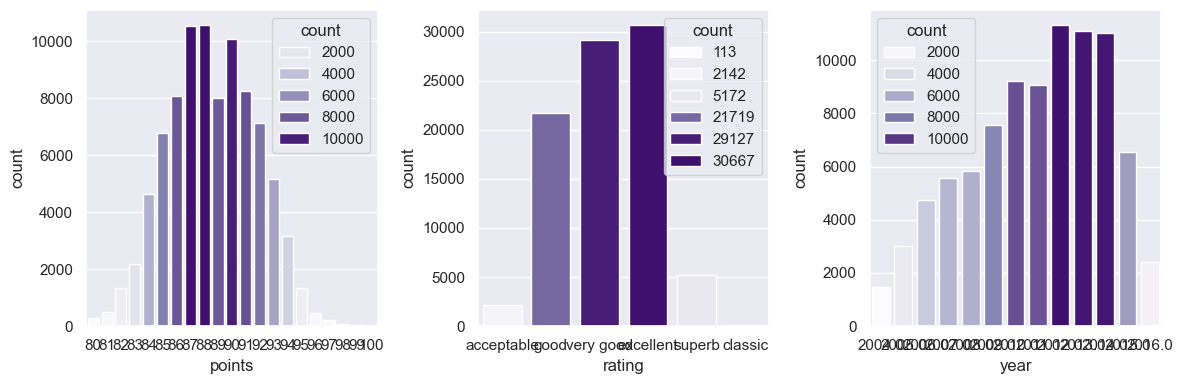

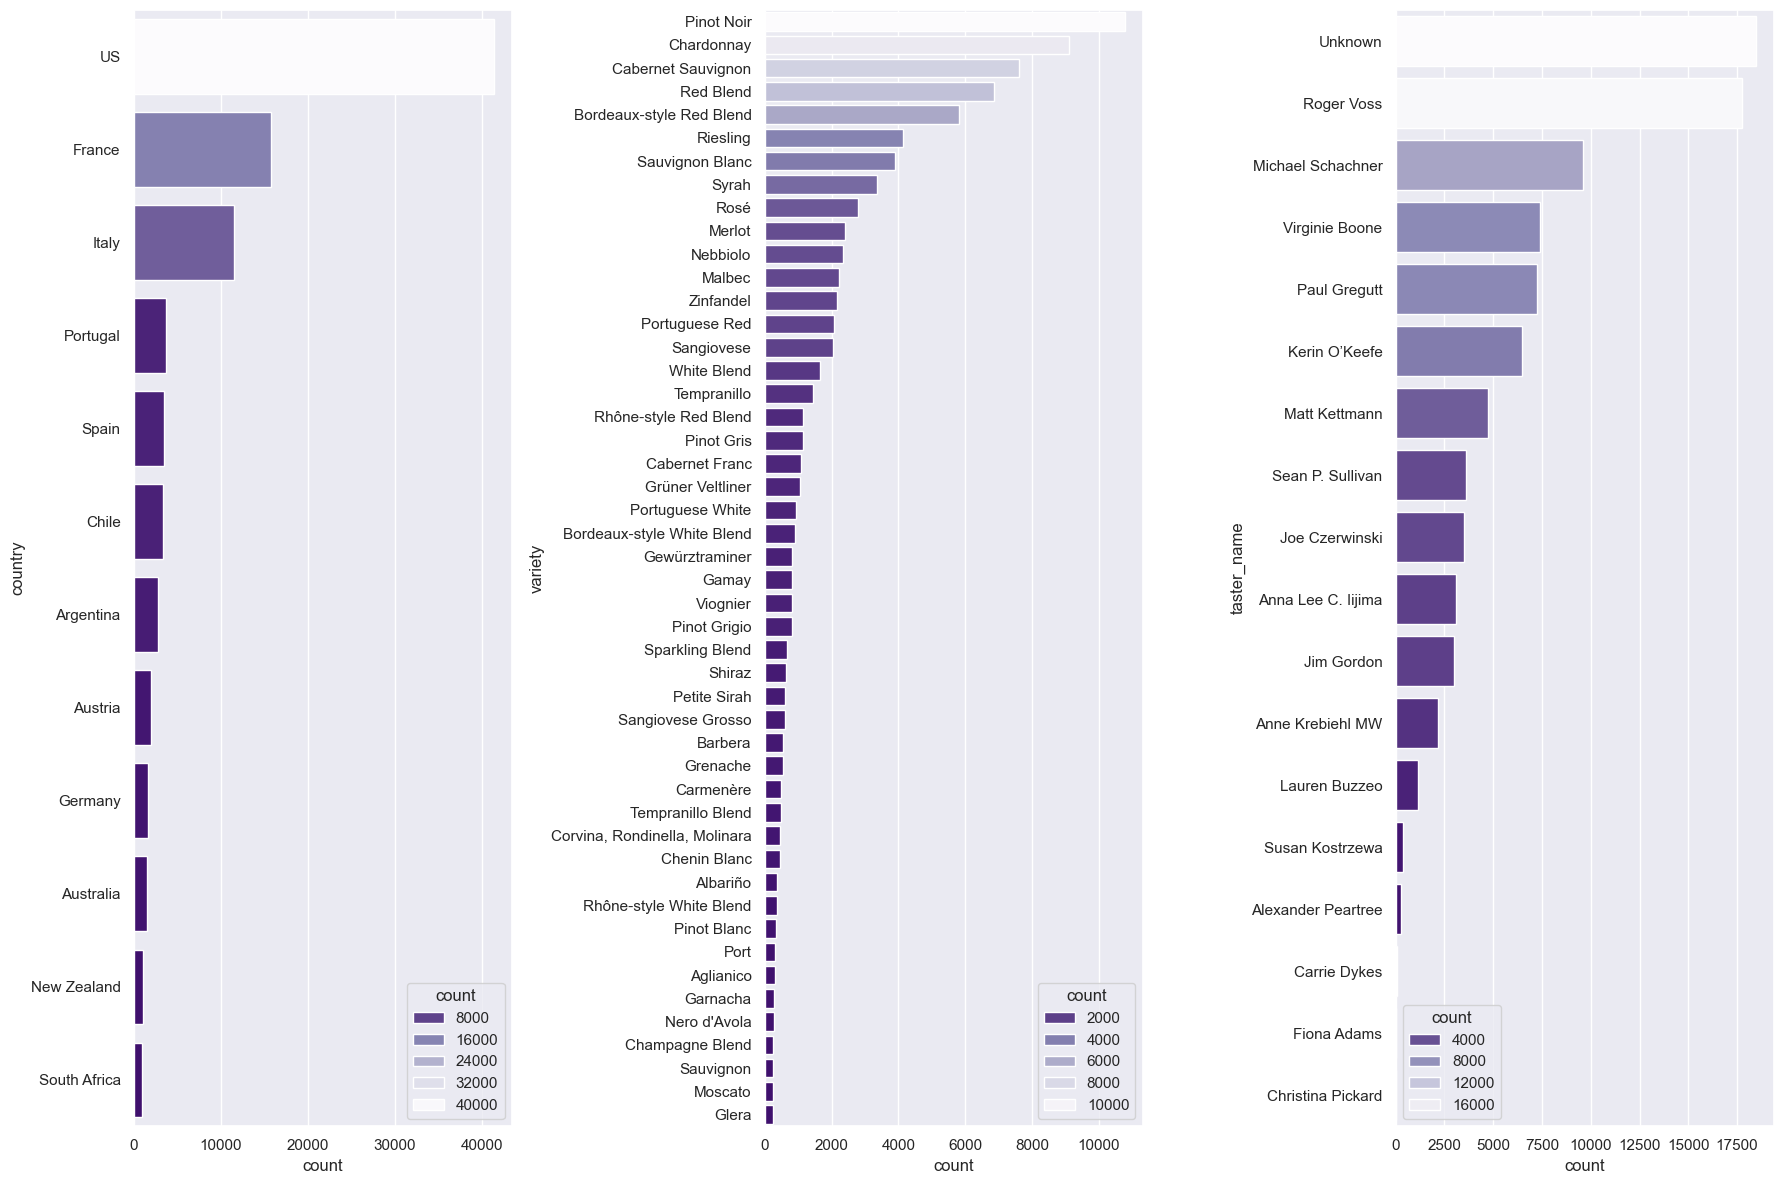

In [365]:
reviews_by_points = by_('points', reviews)
reviews_by_rating = by_('rating', reviews)
reviews_by_year = by_('year', reviews)

reviews_by_country = by_('country', reviews)
reviews_by_variety = by_('variety', reviews)
reviews_by_taster = by_('taster_name', reviews)

fig, ax = plt.subplots(1,3, figsize=(12,4))
sns.barplot(reviews_by_points, hue='count', x='points', y='count', palette='Purples', ax=ax[0])
sns.barplot(reviews_by_rating, hue='count', x='rating', y='count', palette='Purples', ax=ax[1], order=ratings)
sns.barplot(reviews_by_year.iloc[:25], hue='count', x='year', y='count', palette='Purples', ax=ax[2])
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(1,3, figsize=(18,12))
sns.barplot(reviews_by_country, hue='count', y='country', x='count', palette='Purples_r', ax=ax[0])
sns.barplot(reviews_by_variety, hue='count', y='variety', x='count', palette='Purples_r', ax=ax[1])
sns.barplot(reviews_by_taster, hue='count', y='taster_name', x='count', palette='Purples_r', ax=ax[2])
fig.tight_layout()
plt.show()

In [366]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression

def create_review_len_pipeline(estimator = LinearRegression()):
  return Pipeline([('pre',ColumnTransformer([('num', StandardScaler(), ['year']),
                                              ('len', Pipeline([('poly', PolynomialFeatures(degree=2)), ('scale', StandardScaler())]),['review_len']),
                                              ('cat', OneHotEncoder(drop='first'), ['country', 'variety'])
                                            ])),
                    ('lr',estimator)
                  ])

In [367]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, hamming_loss, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

def validation_metrics(best_estimator, X_val, y_val):
  """
  function return summary of evaluation for the model 
  """
  y_preds = best_estimator.predict(X_val)
  y_preds_proba = best_estimator.predict_proba(X_val)

  # change evaluation methods if needed
  average = 'macro'
  accuracy = accuracy_score(y_val, y_preds)
  f1 = f1_score(y_val, y_preds, average=average)
  hammer_loss= hamming_loss(y_val, y_preds)
  precision = precision_score(y_val, y_preds, average=average)
  recall = recall_score(y_val, y_preds, average=average)
  # roc_auc = roc_auc_score(y_val, y_preds_proba, average='weighted',multi_class='ovo')
  class_report = classification_report(y_val, y_preds)

  df = pd.DataFrame({'accuracy': accuracy,
                     'f1': f1,
                     'hammer_loss': hammer_loss,
                     'precision': precision,
                     'recall': recall,
                    #  'roc_auc': roc_auc
                     }, 
                    index=[best_estimator.__class__.__name__])
  
  return {
      'detail': df,
      'summary': class_report,
      'predictions': y_preds,
      'pred_proba': y_preds_proba
  }

def plot_conf_matrix(y_true, y_pred, labels):
  """
  Plot confusion matrix
  """
  _, ax = plt.subplots(figsize=(15, 10))
  conf_matrix = confusion_matrix(y_true, y_pred, normalize='pred')
  sns.set_theme(font_scale=1)
  sns.heatmap(conf_matrix, 
              xticklabels=labels, yticklabels=labels,
              annot=True, 
              ax=ax, 
              cmap="Purples", 
              fmt=".2f", 
              annot_kws={"size": 10});
  ax.set_xlabel('Predictions')
  ax.set_ylabel('True lables')

**Accuracy on Points**

Training Accuracy: 19.0%
Test Accuracy: 18.4%


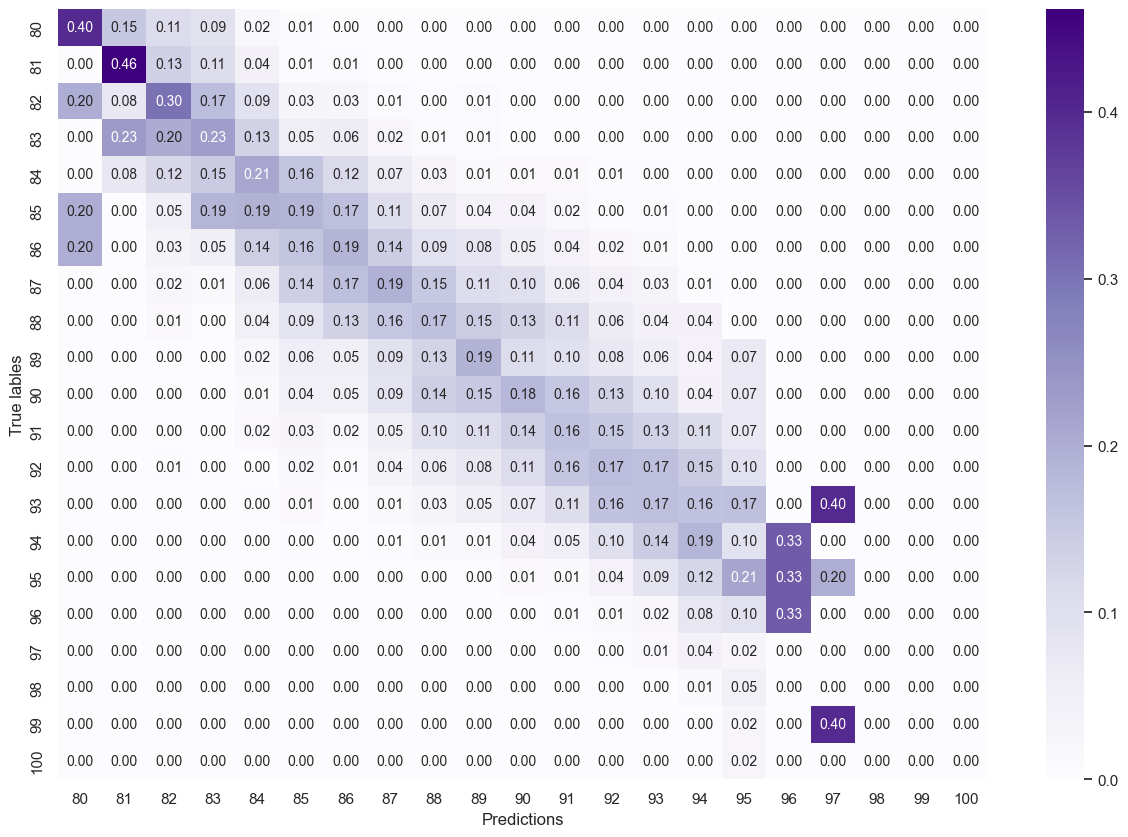

In [ ]:
# define the feature matrix and target vector
le = LabelEncoder()
X, y = reviews[['country', 'variety', 'year', 'review_len']], le.fit_transform(reviews.points)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# fit the model
pipe = Pipeline([('pre',ColumnTransformer([('num', StandardScaler(), ['year']),
                                           ('len', Pipeline([('poly', PolynomialFeatures(degree=2)), ('scale', StandardScaler())]),['review_len']),
                                           ('cat', OneHotEncoder(drop='first'), ['country', 'variety'])
                                         ])),
                 ('lr',LogisticRegression(max_iter=500))
               ]).fit(X_train, y_train)

# measure its performance
print(f'Training Accuracy: {pipe.score(X_train, y_train):.1%}')
print(f'Test Accuracy: {pipe.score(X_test, y_test):.1%}')
plot_conf_matrix(y_test, pipe.predict(X_test), labels=np.unique(reviews.points))

**Accuracy on Rating**

Training Accuracy: 52.8%
Test Accuracy: 51.7%


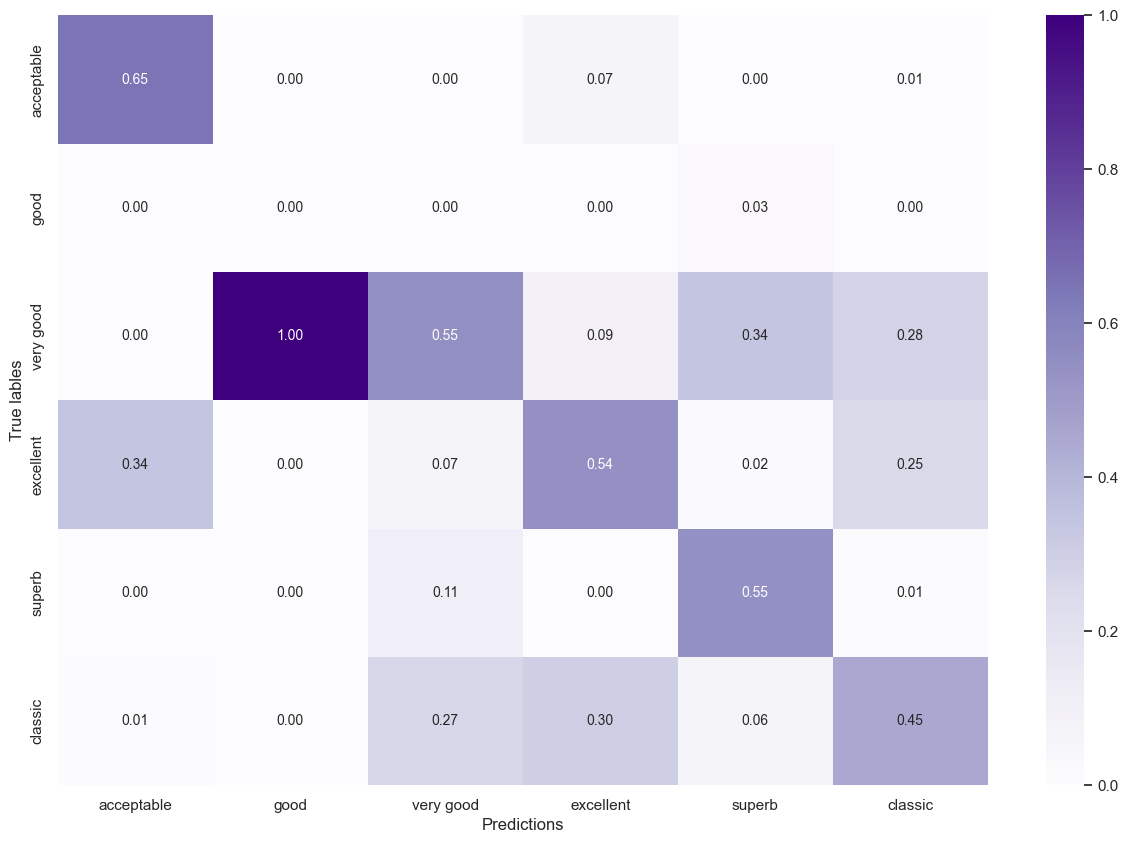

In [372]:
# Split the data into training and testing sets
le = LabelEncoder()
y = le.fit_transform(reviews.rating)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# fit the model
pipe = create_review_len_pipeline(LogisticRegression(max_iter=500)).fit(X_train, y_train)

# measure its performance
print(f'Training Accuracy: {pipe.score(X_train, y_train):.1%}')
print(f'Test Accuracy: {pipe.score(X_test, y_test):.1%}')
plot_conf_matrix(y_test, pipe.predict(X_test), labels=ratings)

**Add Wine Type Classification**

In [373]:
from collections import namedtuple
import pandas as pd

WINE_STYLE = namedtuple('WINE_STYLE', ['name', 'varieties'])

# wine varieties by wine style
sparkling = WINE_STYLE('sparkling', ['Cava','Prosecco', 'Crémant','Champagne', 'Spumante', 'Sparkling Blend', 'Champagne Blend'])

light_white = WINE_STYLE('light_white',
                         ['Albariño','Aligoté','Assyrtiko','Chablis','Chasselas','Chenin Blanc','Cortese','Friulano','Sauvignon Vert','Garganega','Grenache Blanc','Garnacha', 'Muscadet','Melon','Picpoul de Pinet','Pinot Blanc','Pinot Grigio','Pinot Gris','Verdejo','Verdicchio','Xarel-lo',]\
                          + ['Erbaluce','Grüner Veltliner','Sancerre','Sauvignon Blanc','Vermentino','Vinho Verde', 'Portuguese White']
                        )
full_white = WINE_STYLE('full_white', ['Chardonnay','Marsanna','Sémillon','Trebbiano','Viognier','White Rioja','Pecorino', 'White Blend'])
aromatic_white = WINE_STYLE('aromatic_white', ['Gewürztraminer','Müller-Thurgau','Moschofilero','Muscat','Muscat Blanc','Moscato','Riesling','Torrontés','Glera','Bordeaux-style White Blend', 'Sauvignon','Rhône-style White Blend'])
rose = WINE_STYLE('rose', ['Rosé', 'Rose'])
light_red = WINE_STYLE('light_red', ['Schiava', 'Gamay', 'Pinot Noir','Counoise', 'St. Laurent','Cinsaut','Primitivo','Blaufränkisch','Barolo'])
medium_red = WINE_STYLE('medium_red', ['Carmenère','Grenache','Granacha','Valpolicella Blend','Corvina, Rondinella, Molinara','Bobal','Carménère','Carignan','Cabernet Franc','Mencía', 'Sangiovese','Negroamaro','Rhône-style Red Blend', 'Rhône/GSM Blend','Barbera','Merlot','Montepulciano','Zinfandel','Marquette','Chambourcin','Petite Pearl','Red Blend', 'Portuguese Red'])
full_red = WINE_STYLE('full_red', ['Sangiovese Grosso','Tempranillo','Tempranillo Blend','Nebbiolo',"Nero d'Avola",'Aglianico','Malbec','Bordeaux Blend','Cabernet Sauvignon','Syrah','Shiraz','Priorat','Touriga Franca','Pinotage','Petit Verdot','Mourvèdre','Touriga Nacional','Petite Sirah','Sagrantino','Tannat','Bordeaux-style Red Blend'])
dessert = WINE_STYLE('dessert', ['Ice Wine','Late Harvest','Madeira','Malvasia','Sauternes','Sherry','Tokaji','Vin Santo','White Port','Port','Porto','Marsala','Noble Rot','Passito','Freisa'])

all_varieties = pd.Series(sparkling.varieties + light_white.varieties + full_white.varieties + aromatic_white.varieties + rose.varieties + light_red.varieties + medium_red.varieties + full_red.varieties + dessert.varieties)

# assign style
styles = [sparkling, light_white, full_white, aromatic_white, rose, light_red, medium_red, full_red, dessert]
to_style = lambda wine: next(map(lambda style: style.name, filter(lambda style: wine in style.varieties, styles)))
to_type = lambda wine: next(map(lambda style: style.name.split('_')[-1], filter(lambda style: wine in style.varieties, styles)))

# verify there are no variety duplicated in any of the style varietals
assert all_varieties[all_varieties.duplicated()].count() == 0

# verify the style assignment logic
assert to_style('Pinot Noir') == 'light_red'
assert to_type('Pinot Noir') == 'red'
print('Pinot Noir', f'is a {to_type('Pinot Noir')} wine, more specifically, a {to_style('Pinot Noir')} wine') 

Pinot Noir is a red wine, more specifically, a light_red wine


In [374]:
reviews['wine_style'] = reviews.variety.apply(to_style)
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
Index: 88940 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      88940 non-null  object 
 1   description  88940 non-null  object 
 2   points       88940 non-null  int64  
 3   province     88940 non-null  object 
 4   taster_name  88940 non-null  object 
 5   title        88940 non-null  object 
 6   variety      88940 non-null  object 
 7   winery       88940 non-null  object 
 8   year         88940 non-null  float64
 9   review_len   88940 non-null  int64  
 10  rating       88940 non-null  object 
 11  wine_style   88940 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 8.8+ MB


,country,description,points,province,taster_name,title,variety,winery,year,review_len,rating,wine_style
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0,172,very good,full_white
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,227,very good,medium_red
2,US,"Tart and snappy, the flavors of lime flesh and...",87,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,186,very good,light_white
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,199,very good,aromatic_white
4,US,"Much like the regular bottling from 2012, this...",87,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,249,very good,light_red


Training Accuracy: 18.4%
Test Accuracy: 18.1%


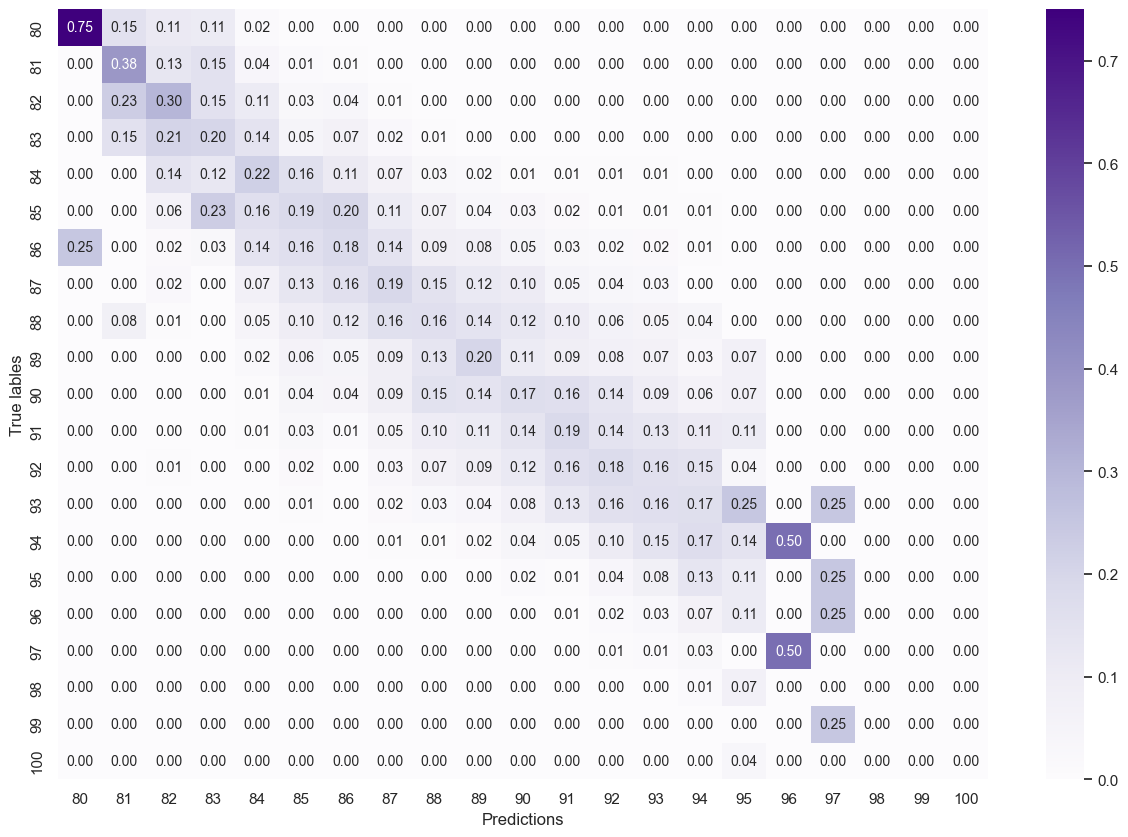

In [375]:
le = LabelEncoder()
X, y = reviews[['country', 'wine_style', 'year', 'review_len']], le.fit_transform(reviews.points)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# fit the model
pipe = Pipeline([('pre',ColumnTransformer([('num', StandardScaler(), ['year']),
                                           ('len', Pipeline([('poly', PolynomialFeatures(degree=2)), ('scale', StandardScaler())]),['review_len']),
                                           ('cat', OneHotEncoder(drop='first'), ['country', 'wine_style'])
                                         ])),
                 ('lr',LogisticRegression(max_iter=500))
               ]).fit(X_train, y_train)

# measure its performance
print(f'Training Accuracy: {pipe.score(X_train, y_train):.1%}')
print(f'Test Accuracy: {pipe.score(X_test, y_test):.1%}')
plot_conf_matrix(y_test, pipe.predict(X_test), labels=np.unique(reviews.points))

Training Accuracy: 52.2%
Test Accuracy: 51.2%


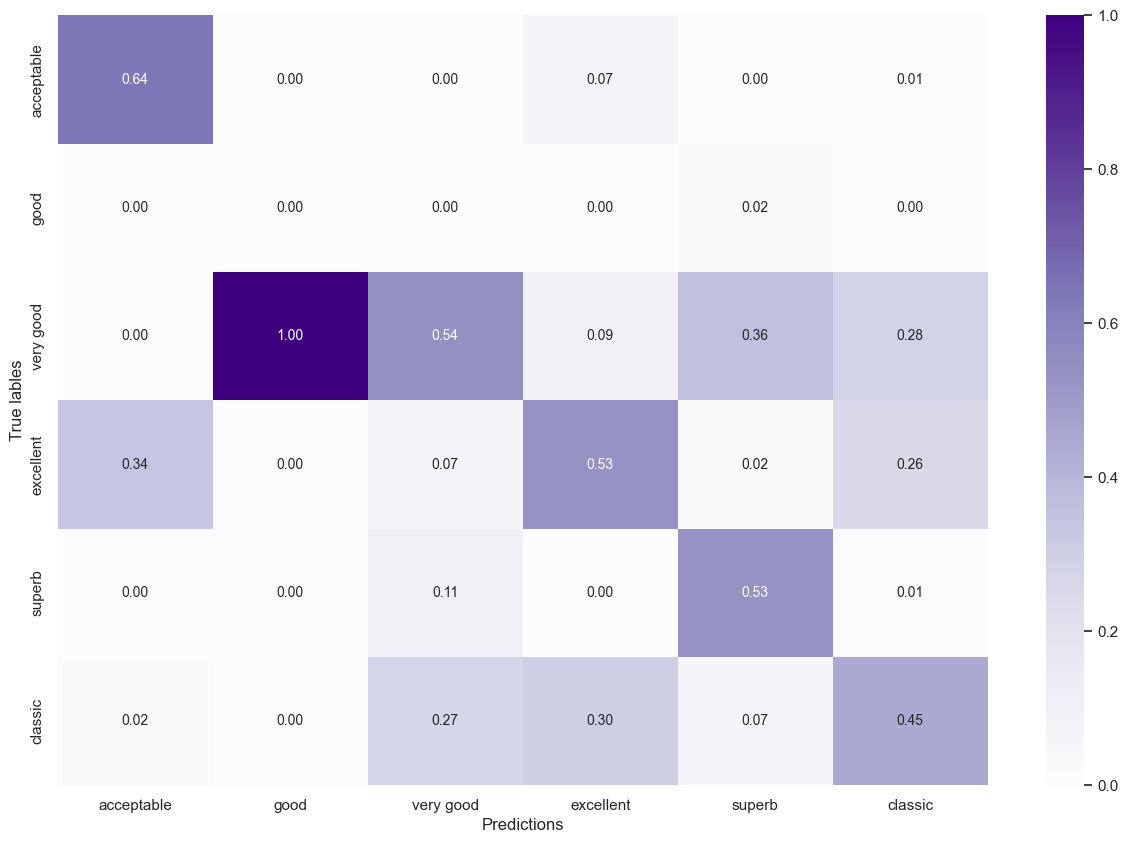

In [376]:
le = LabelEncoder()
X, y = reviews[['country', 'wine_style', 'year', 'review_len']], le.fit_transform(reviews.rating)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# fit the model
pipe = Pipeline([('pre',ColumnTransformer([('num', StandardScaler(), ['year']),
                                           ('len', Pipeline([('poly', PolynomialFeatures(degree=2)), ('scale', StandardScaler())]),['review_len']),
                                           ('cat', OneHotEncoder(drop='first'), ['country', 'wine_style'])
                                         ])),
                 ('lr',LogisticRegression(max_iter=500))
               ]).fit(X_train, y_train)

# measure its performance
print(f'Training Accuracy: {pipe.score(X_train, y_train):.1%}')
print(f'Test Accuracy: {pipe.score(X_test, y_test):.1%}')
plot_conf_matrix(y_test, pipe.predict(X_test), labels=ratings)

**Preprocess**

In [387]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer, HashingVectorizer
from nltk.corpus import stopwords

swords = stopwords.words('english') + ['year', 'years', 'wine', 'wines']

vectorizer = TfidfVectorizer(stop_words=swords, min_df=.015, max_df=.95)
tfidf = vectorizer.fit_transform(reviews.description).toarray()
# drop columns that are numbers, like '100' or '2016', etc.
token_cols = list(filter(lambda col: col[0].isalpha(), vectorizer.get_feature_names_out()))
# create the feature matrix with the tokens replacing review length
X = pd.concat([reviews[['variety', 'year', 'country']], pd.DataFrame(tfidf, index=reviews.index, columns=vectorizer.get_feature_names_out())[token_cols]], axis=1)
X.head()

,variety,year,country,acidity,acids,aftertaste,age,aged,aging,alcohol,...,whiff,white,wild,winery,wood,yellow,yet,young,zest,zesty
0,White Blend,2013.0,Italy,0.161411,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Portuguese Red,2011.0,Portugal,0.162601,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pinot Gris,2013.0,US,0.237380,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Riesling,2013.0,US,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pinot Noir,2012.0,US,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Training Accuracy: 24.1%
Test Accuracy: 20.6%


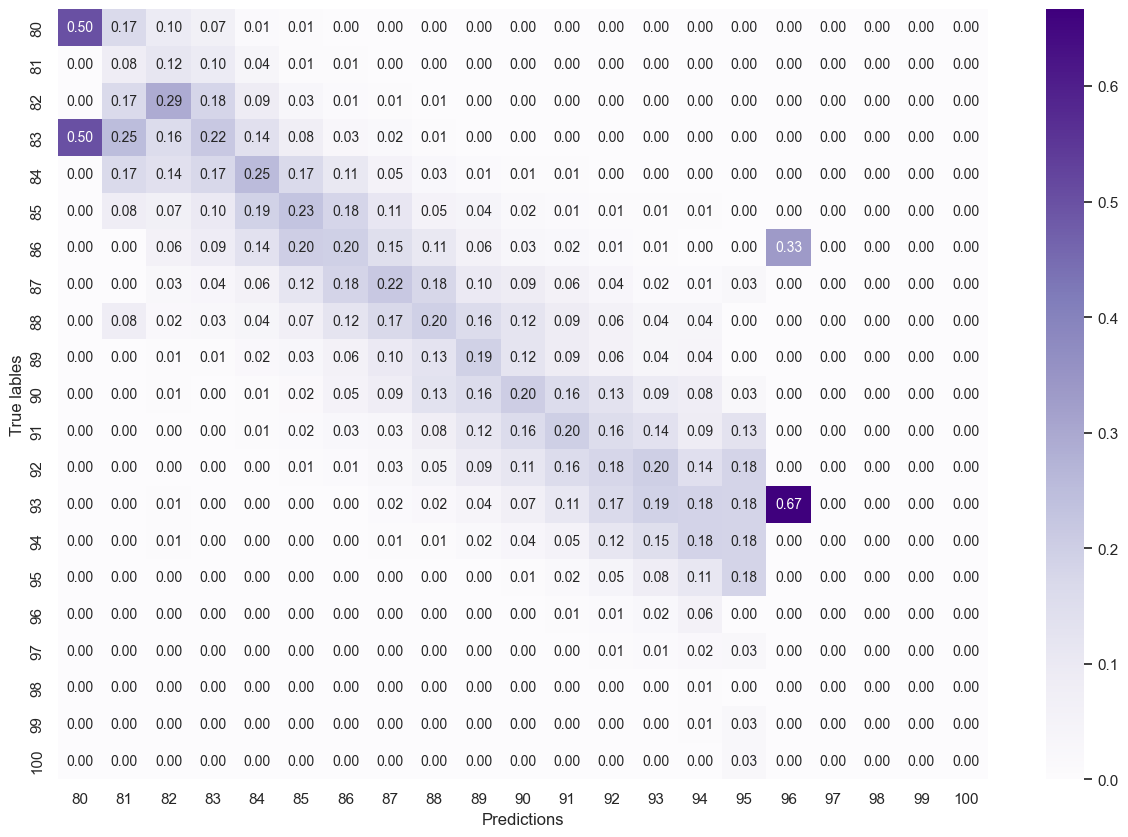

In [388]:
le = LabelEncoder()
y = le.fit_transform(reviews.points)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# fit the model
pipe = Pipeline([('pre',ColumnTransformer([('num', StandardScaler(), ['year']),
                                          #  ('len', Pipeline([('poly', PolynomialFeatures(degree=2)), ('scale', StandardScaler())]),['review_len']),
                                           ('cat', OneHotEncoder(drop='first'), ['country', 'variety'])
                                         ], remainder='passthrough')),
                 ('lr',LogisticRegression(max_iter=500))
               ]).fit(X_train, y_train)

# measure its performance
print(f'Training Accuracy: {pipe.score(X_train, y_train):.1%}')
print(f'Test Accuracy: {pipe.score(X_test, y_test):.1%}')
plot_conf_matrix(y_test, pipe.predict(X_test), labels=np.unique(reviews.points))

**Embeddings**

In [389]:
import time
from collections import namedtuple

PERF = namedtuple('PERF', ['algo', 'duration'])

timings = []

def timeit(algo, purpose, func, count, items='documents'):
  start = time.perf_counter()
  result = func()
  elapsed = time.perf_counter()-start
  timings.append(PERF(algo, elapsed))
  display(Markdown(f'It took ${elapsed/60:.1f}$ minutes to {purpose} for ${count:,d}$ {items}.'))

In [390]:
from sentence_transformers import SentenceTransformer

def compute_embeddings(corpus, model_name='all-MiniLM-L6-v2'):
  # timing helper
  __t = lambda purpose, func: timeit(model_name, purpose, func, len(corpus), 'reviews')

  # calculate embeddings using a pretrained sentence transformer model
  model = SentenceTransformer(model_name)
  return __t('compute embeddings', lambda: model.encode(corpus, normalize_embeddings=True, show_progress_bar=True, device='mps'))

2025-03-15 17:16:34.876517: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# compute embeddings and similarities vectors
# mpnet_embeddings = compute_embeddings(reviews.description.to_list(), 'all-mpnet-base-v2')
# mpnet_embeddings.shape